# One-Class SVM

This anomaly detection method uses a support vector machine to learn a decision boundary in high dimensional space to isolate outliers. This method is also effective for high-dimensional data and is computationally efficient, but requires parameter tuning for nu -- the proportion of outliers. We find that nu = 0.001 works best for this case.

In [1]:
# import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM

c:\Users\Tejas Srivatsav\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('intc_data.csv')

In [3]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.to_period('M').astype(str)
print(data['Date'])

0       1985-01
1       1985-01
2       1985-01
3       1985-01
4       1985-01
         ...   
7559    2014-12
7560    2014-12
7561    2014-12
7562    2014-12
7563    2014-12
Name: Date, Length: 7564, dtype: object


C:\Users\Tejas Srivatsav\AppData\Local\Temp\ipykernel_43492\3785880456.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.to_period('M').astype(str)


In [4]:
# Indicators to consider
indicators = ['Volume', 'SMA_50', 'RSI', 'MACD', 'Upper_BB', 'Lower_BB']
# Normalize the features
scaler = MinMaxScaler()
data[indicators] = scaler.fit_transform(data[indicators])

In [5]:
# Create a One-Class SVM model
model = OneClassSVM(nu=0.001)  # Adjust nu as needed

# Fit the model to the data
model.fit(data[indicators])

# Predict anomalies
predictions = model.predict(data[indicators])

# Identify outliers
outliers = data[predictions == -1]

In [6]:
print(outliers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 386 to 5148
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          11 non-null     object 
 1   Open          11 non-null     float64
 2   High          11 non-null     float64
 3   Low           11 non-null     float64
 4   Close         11 non-null     float64
 5   Volume        11 non-null     float64
 6   Dividends     11 non-null     float64
 7   Stock Splits  11 non-null     float64
 8   Return        11 non-null     float64
 9   SMA_50        11 non-null     float64
 10  EMA_20        11 non-null     float64
 11  WMA_30        11 non-null     float64
 12  RSI           11 non-null     float64
 13  Upper_BB      11 non-null     float64
 14  Lower_BB      11 non-null     float64
 15  MACD          11 non-null     float64
 16  Signal_Line   11 non-null     float64
dtypes: float64(16), object(1)
memory usage: 1.5+ KB
None


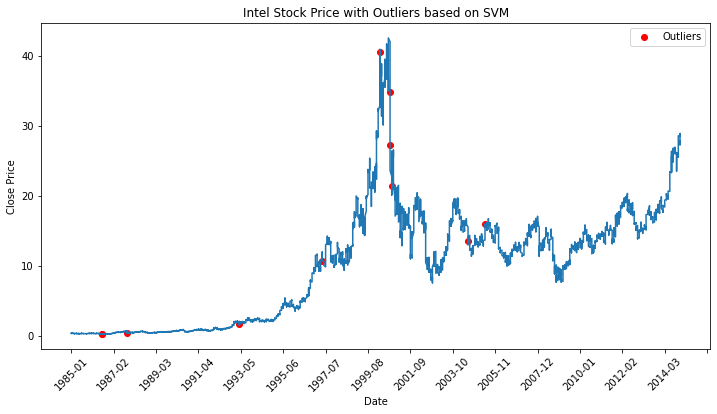

In [7]:
# Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.scatter(outliers['Date'], outliers['Close'], color='red', label='Outliers')
plt.title('Intel Stock Price with Outliers based on SVM')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(25))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In this case the One-Class SVM does find several outliers during the Dot-Com Crash but also finds 4 between 1985 and 1997. Intuitively it doesn't seem to isolate the data as well as the isolation forest.   